## Life cycle of Machine learning project

- Understanding the Problem statement
- Data Collection
- Data Checks to perfom
- Exploratory data analysis
- Model Training 
- Chooe Best Model

### 1) Problem Statement

- This project understands how the student's perfomance (test scores) is affected by the other variables such as Gender, Ethinicity,Parentel level of education,Lunch and Test prepration cource.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

- The Data consists of 8 column and 1000 rows

## 2.1 Import Data and Requires packages

Importing numpy, pandas, seaborn, matplotlib and warnings library.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Import the CSV Data and Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()      # Top 5 records

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape      # shape of the dataset

(1000, 8)

## Dataset Information 

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df.isna().sum()       # check the missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()              # check the duplicated values

0

In [7]:
# Check Null and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Checking the number of unique values of each column/
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# STATISTICS OF THE DATA

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights from statistics

- mean of all the columns are near to each other 
- standard deviation is also near to each other
- This means that the range or spread of the values in each feature is roughly the same.

In [17]:
def unique(column):                          # Creating function for getting unique values in each 
    unique_values = df[column].unique()
    number_of_unique_val = df[column].nunique()
    return f'{column.capitalize()} - {unique_values} - {number_of_unique_val}'

for i in df.select_dtypes(include = ['object']).columns:
    print(unique(i))
    print()

Gender - ['female' 'male'] - 2

Race_ethnicity - ['group B' 'group C' 'group A' 'group D' 'group E'] - 5

Parental_level_of_education - ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] - 6

Lunch - ['standard' 'free/reduced'] - 2

Test_preparation_course - ['none' 'completed'] - 2



# Adding columns for "Total Score" and "Average"

In [19]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
# Getting all numerical and categorical features seperately

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [23]:
reading_full = df[df['reading_score'] == 100]['Average score'].count()
writing_full = df[df['writing_score'] == 100]['Average score'].count()
math_full = df[df['math_score'] == 100]['Average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [25]:
reading_less_20 = df[df['reading_score'] <= 20]['Average score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average score'].count()
math_less_20 = df[df['math_score'] <= 20]['Average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

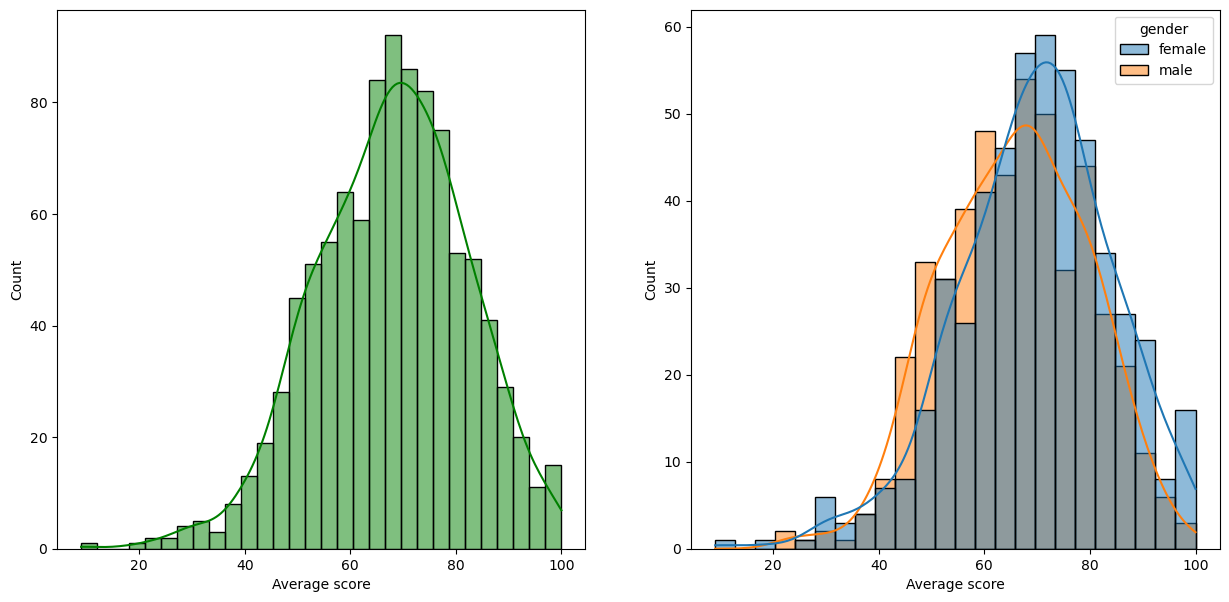

In [28]:
fig, axs = plt.subplots(1,2 ,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x = 'Average score',bins =30,kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df,x='Average score',kde = True,hue = 'gender')
plt.show()

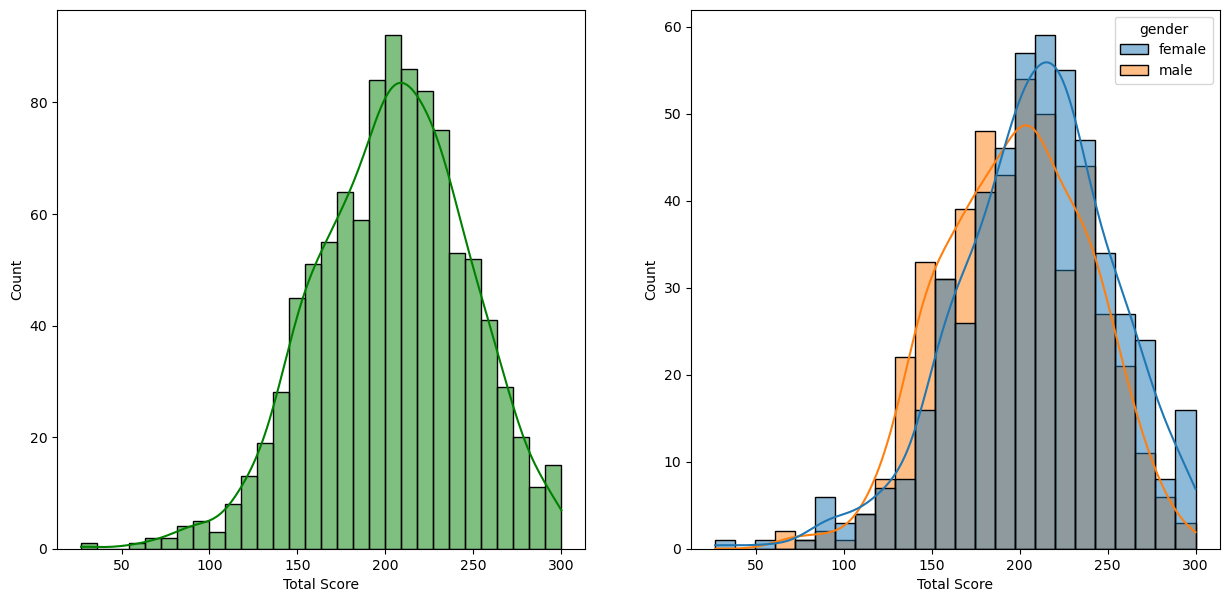

In [29]:
fig, axs = plt.subplots(1,2 ,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x = 'Total Score',bins =30,kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df,x='Total Score',kde = True,hue = 'gender')
plt.show()

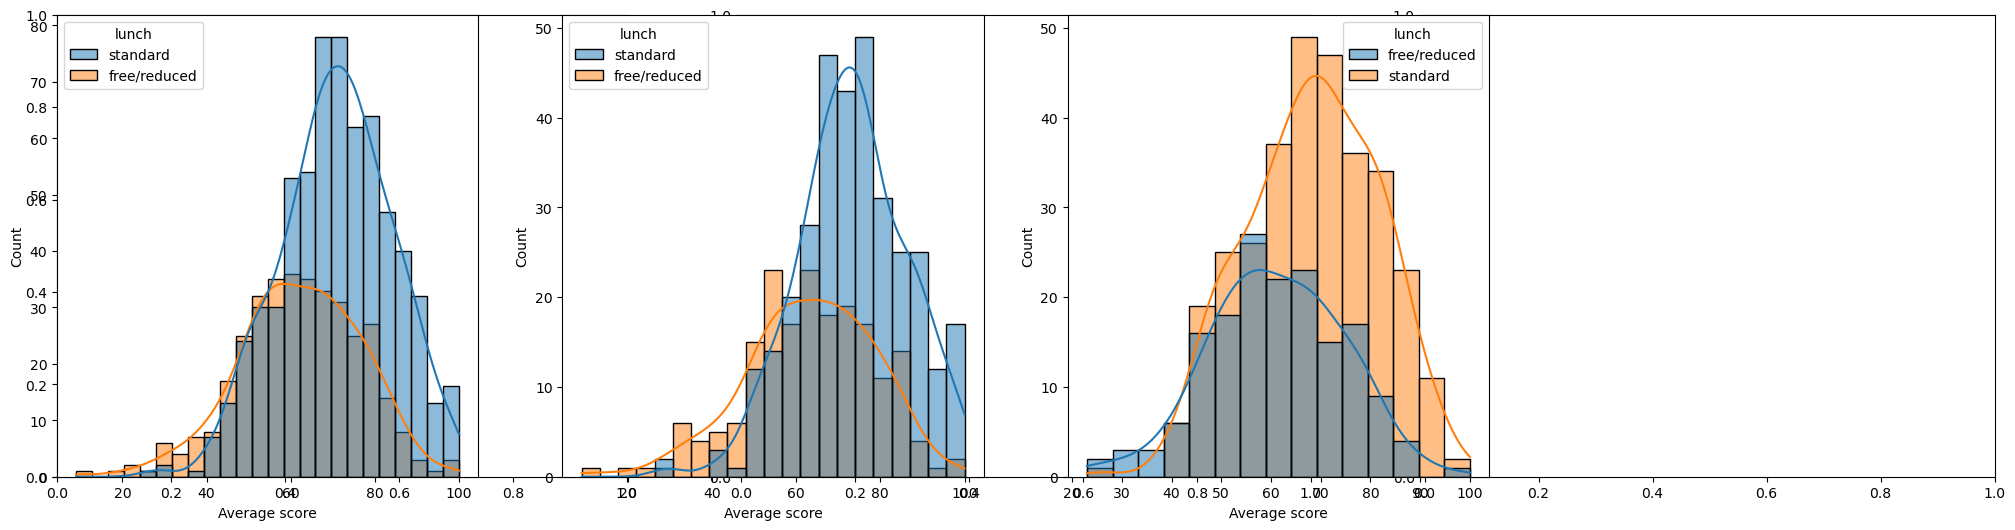

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='lunch')
plt.show()